In [28]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../datasets/memory_experiment_merged.csv")
print(len(df), "rows")

96 rows


In [3]:
list(df.columns)

['Unnamed: 0',
 'Name',
 'State',
 'Notes',
 'User',
 'Tags',
 'Created',
 'Runtime',
 'Sweep',
 'GPU Type',
 'GPU Count',
 '_name_or_path',
 'adafactor',
 'adam_beta1',
 'adam_beta2',
 'adam_epsilon',
 'add_cross_attention',
 'architectures',
 'attention_dropout',
 'auto_find_batch_size',
 'bf16',
 'bf16_full_eval',
 'bos_token_id',
 'chunk_size_feed_forward',
 'dataloader_drop_last',
 'dataloader_num_workers',
 'dataloader_persistent_workers',
 'dataloader_pin_memory',
 'ddp_timeout',
 'debug',
 'disable_tqdm',
 'diversity_penalty',
 'do_eval',
 'do_predict',
 'do_sample',
 'do_train',
 'early_stopping',
 'encoder_no_repeat_ngram_size',
 'eos_token_id',
 'eval_delay',
 'eval_steps',
 'evaluation_strategy',
 'fp16',
 'fp16_backend',
 'fp16_full_eval',
 'fp16_opt_level',
 'fsdp',
 'fsdp_config.min_num_params',
 'fsdp_config.xla',
 'fsdp_config.xla_fsdp_grad_ckpt',
 'fsdp_min_num_params',
 'full_determinism',
 'gradient_accumulation_steps',
 'gradient_checkpointing',
 'group_by_length',

In [4]:
relevant_cols = [
    "run_name",
    "State",
    "Runtime",
    "bf16",
    "fp16",
    "gradient_accumulation_steps",
    "gradient_checkpointing",
    "gradient_checkpointing_kwargs.use_reentrant",
    "quantization_config._load_in_4bit",
    "quantization_config._load_in_8bit",
    "quantization_config.bnb_4bit_compute_dtype",
    "quantization_config.bnb_4bit_quant_type",
    "quantization_config.bnb_4bit_use_double_quant",
    "quantization_config.quant_method",
    "per_device_train_batch_size",
    "system/gpu.0.memoryAllocatedBytes__MAX",
]

df_memory = df[relevant_cols]

def fix_gradient_checkpointing(df: pd.DataFrame):
    df['gradient_checkpointing'] = df['run_name'].map(lambda x: bool(int(re.search(r"-gc(\d)-", x).groups()[0])))

def extract_context_length(df: pd.DataFrame):
    df['context_length'] = df['run_name'].map(lambda x: int(re.search(r"-ctx(\d+)-", x).groups()[0]))
    
def extract_rvalue(df: pd.DataFrame):
    df['lora_rvalue'] = df['run_name'].map(lambda x: int(re.search(r"_rv(\d+)-", x).groups()[0]))

def from_bytes_to_gigas(df: pd.DataFrame):
    df['memory_used_gigas'] = df['system/gpu.0.memoryAllocatedBytes__MAX'].map(lambda x: x / 1024**3)

fix_gradient_checkpointing(df_memory)
extract_context_length(df_memory)
extract_rvalue(df_memory)
from_bytes_to_gigas(df_memory)

# Change column type to bool for column: 'gradient_checkpointing_kwargs.use_reentrant'
df_memory = df_memory.astype({'gradient_checkpointing_kwargs.use_reentrant': 'bool'})

# Replace all instances of False with False in column: 'gradient_checkpointing_kwargs.use_reentrant'
df_memory.loc[df_memory['gradient_checkpointing_kwargs.use_reentrant'] == True, 'gradient_checkpointing_kwargs.use_reentrant'] = False

# Replace missing values with 100000000000 in column: 'system/gpu.0.memoryAllocatedBytes__MAX'
df_memory = df_memory.fillna({'system/gpu.0.memoryAllocatedBytes__MAX': 100000000000})

# Replace missing values with 100 in column: 'memory_used_gigas'
df_memory = df_memory.fillna({'memory_used_gigas': 100})

# Rename column 'State' to 'is_success'
df_memory = df_memory.rename(columns={'State': 'is_success'})

# Replace all instances of "failed" with "0" in column: 'is_success'
df_memory['is_success'] = df_memory['is_success'].str.replace("failed", "0", case=False, regex=False)

# Replace all instances of "finished" with "1" in column: 'is_success'
df_memory['is_success'] = df_memory['is_success'].str.replace("finished", "1", case=False, regex=False)

# Change column type to int64 for column: 'is_success'
df_memory = df_memory.astype({'is_success': 'int64'})

# Change column type to bool for column: 'is_success'
df_memory = df_memory.astype({'is_success': 'bool'})

# Change column type to string for column: 'run_name'
df_memory = df_memory.astype({'run_name': 'string'})


df_memory.head()

C:\Users\Alexis Strappazzon\AppData\Local\Temp\ipykernel_22672\2917898917.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gradient_checkpointing'] = df['run_name'].map(lambda x: bool(int(re.search(r"-gc(\d)-", x).groups()[0])))
C:\Users\Alexis Strappazzon\AppData\Local\Temp\ipykernel_22672\2917898917.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['context_length'] = df['run_name'].map(lambda x: int(re.search(r"-ctx(\d+)-", x).groups()[0]))
C:\Users\Alexis Strappazzon\AppData\Local\Temp\ipy

,run_name,is_success,Runtime,bf16,fp16,gradient_accumulation_steps,gradient_checkpointing,gradient_checkpointing_kwargs.use_reentrant,quantization_config._load_in_4bit,quantization_config._load_in_8bit,quantization_config.bnb_4bit_compute_dtype,quantization_config.bnb_4bit_quant_type,quantization_config.bnb_4bit_use_double_quant,quantization_config.quant_method,per_device_train_batch_size,system/gpu.0.memoryAllocatedBytes__MAX,context_length,lora_rvalue,memory_used_gigas
0,memory_experiment-Mistral-7B-Instruct-v0.2_rv2...,False,27,True,False,4,True,False,True,False,bfloat16,nf4,True,QuantizationMethod.BITS_AND_BYTES,8,1.000000e+11,3072,256,100.000000
1,memory_experiment-Mistral-7B-Instruct-v0.2_rv2...,False,5,True,False,4,False,False,True,False,bfloat16,nf4,True,QuantizationMethod.BITS_AND_BYTES,8,1.000000e+11,3072,256,100.000000
2,memory_experiment-Mistral-7B-Instruct-v0.2_rv2...,False,551,True,False,4,True,False,True,False,bfloat16,nf4,True,QuantizationMethod.BITS_AND_BYTES,4,4.155019e+10,3072,256,38.696631
3,memory_experiment-Mistral-7B-Instruct-v0.2_rv2...,False,5,True,False,4,False,False,True,False,bfloat16,nf4,True,QuantizationMethod.BITS_AND_BYTES,4,1.000000e+11,3072,256,100.000000
4,memory_experiment-Mistral-7B-Instruct-v0.2_rv2...,True,2218,True,False,4,True,False,True,False,bfloat16,nf4,True,QuantizationMethod.BITS_AND_BYTES,2,4.277954e+10,3072,256,39.841553


In [5]:
# Make pie charts success/fail for:
# - lora r values, 32, 64, 128, 256
# - Gradient Checkpointing
# - Batch size, 1, 2, 4, 8

In [6]:
df_memory.columns

Index(['run_name', 'is_success', 'Runtime', 'bf16', 'fp16',
       'gradient_accumulation_steps', 'gradient_checkpointing',
       'gradient_checkpointing_kwargs.use_reentrant',
       'quantization_config._load_in_4bit',
       'quantization_config._load_in_8bit',
       'quantization_config.bnb_4bit_compute_dtype',
       'quantization_config.bnb_4bit_quant_type',
       'quantization_config.bnb_4bit_use_double_quant',
       'quantization_config.quant_method', 'per_device_train_batch_size',
       'system/gpu.0.memoryAllocatedBytes__MAX', 'context_length',
       'lora_rvalue', 'memory_used_gigas'],
      dtype='object')

In [7]:
def get_failed_and_success(df):
    return df.loc[~df["is_success"]], df.loc[df["is_success"]]

print(len(df_memory.loc[df_memory["gradient_checkpointing"] == True]), "b")
f, s = get_failed_and_success(df_memory.loc[df_memory["gradient_checkpointing"] == True])
print(len(f), "f")
print(len(s), "s")

48 b
12 f
36 s


Gradient Checkpointing ON:
Failed 12
Succeed 36
Gradient Checkpointing OFF:
Failed 32
Succeed 16


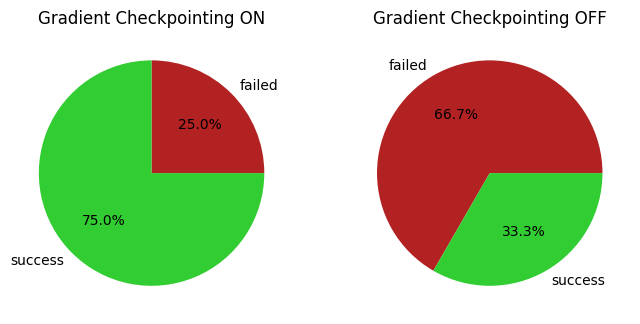

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(8, 8)
f, s = get_failed_and_success(df_memory.loc[df_memory["gradient_checkpointing"] == True])
ax1.pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Gradient Checkpointing ON:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[df_memory["gradient_checkpointing"] == False])
ax2.pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Gradient Checkpointing OFF:")
print("Failed", len(f))
print("Succeed", len(s))

ax1.set_title("Gradient Checkpointing ON");
ax2.set_title("Gradient Checkpointing OFF");

Batch Size 1:
Failed 0
Succeed 24
Batch Size 2:
Failed 8
Succeed 16
Batch Size 4:
Failed 16
Succeed 8
Batch Size 8:
Failed 20
Succeed 4
memory_experiment-Mistral-7B-Instruct-v0.2_rv256-ld0-bs8-ga4-gc1-p0-nta0-e1-ctx1024-q4bit-template-template-stsparql
memory_experiment-Mistral-7B-Instruct-v0.2_rv128-ld0-bs8-ga4-gc1-p0-nta0-e1-ctx1024-q4bit-template-template-stsparql
memory_experiment-Mistral-7B-Instruct-v0.2_rv64-ld0-bs8-ga4-gc1-p0-nta0-e1-ctx1024-q4bit-template-template-stsparql
memory_experiment-Mistral-7B-Instruct-v0.2_rv32-ld0-bs8-ga4-gc1-p0-nta0-e1-ctx1024-q4bit-template-template-stsparql


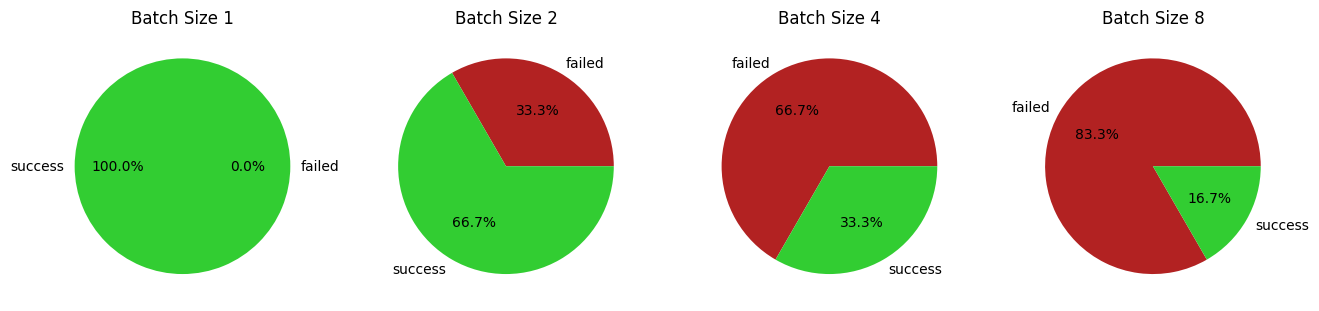

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches(16, 16)

f, s = get_failed_and_success(df_memory.loc[df_memory["per_device_train_batch_size"] == 1])
ax1.pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 1:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[df_memory["per_device_train_batch_size"] == 2])
ax2.pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 2:")
print("Failed", len(f))
print("Succeed", len(s))


f, s = get_failed_and_success(df_memory.loc[df_memory["per_device_train_batch_size"] == 4])
ax3.pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 4:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[df_memory["per_device_train_batch_size"] == 8])
ax4.pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 8:")
print("Failed", len(f))
print("Succeed", len(s))

ax1.set_title("Batch Size 1");
ax2.set_title("Batch Size 2");
ax3.set_title("Batch Size 4");
ax4.set_title("Batch Size 8");

for _,r in s.iterrows():
    print(r["run_name"])

Batch Size 1 & ctx 1024:
Failed 0
Succeed 8
Batch Size 2 & ctx 1024:
Failed 0
Succeed 8
Batch Size 4 & ctx 1024:
Failed 4
Succeed 4
Batch Size 8 & ctx 1024:
Failed 4
Succeed 4
Batch Size 1 & ctx 2048:
Failed 0
Succeed 8
Batch Size 2 & ctx 2048:
Failed 4
Succeed 4
Batch Size 4 & ctx 2048:
Failed 4
Succeed 4
Batch Size 8 & ctx 2048:
Failed 8
Succeed 0
Batch Size 1 & ctx 3072:
Failed 0
Succeed 8
Batch Size 2 & ctx 3072:
Failed 4
Succeed 4
Batch Size 4 & ctx 3072:
Failed 8
Succeed 0
Batch Size 8 & ctx 3072:
Failed 8
Succeed 0


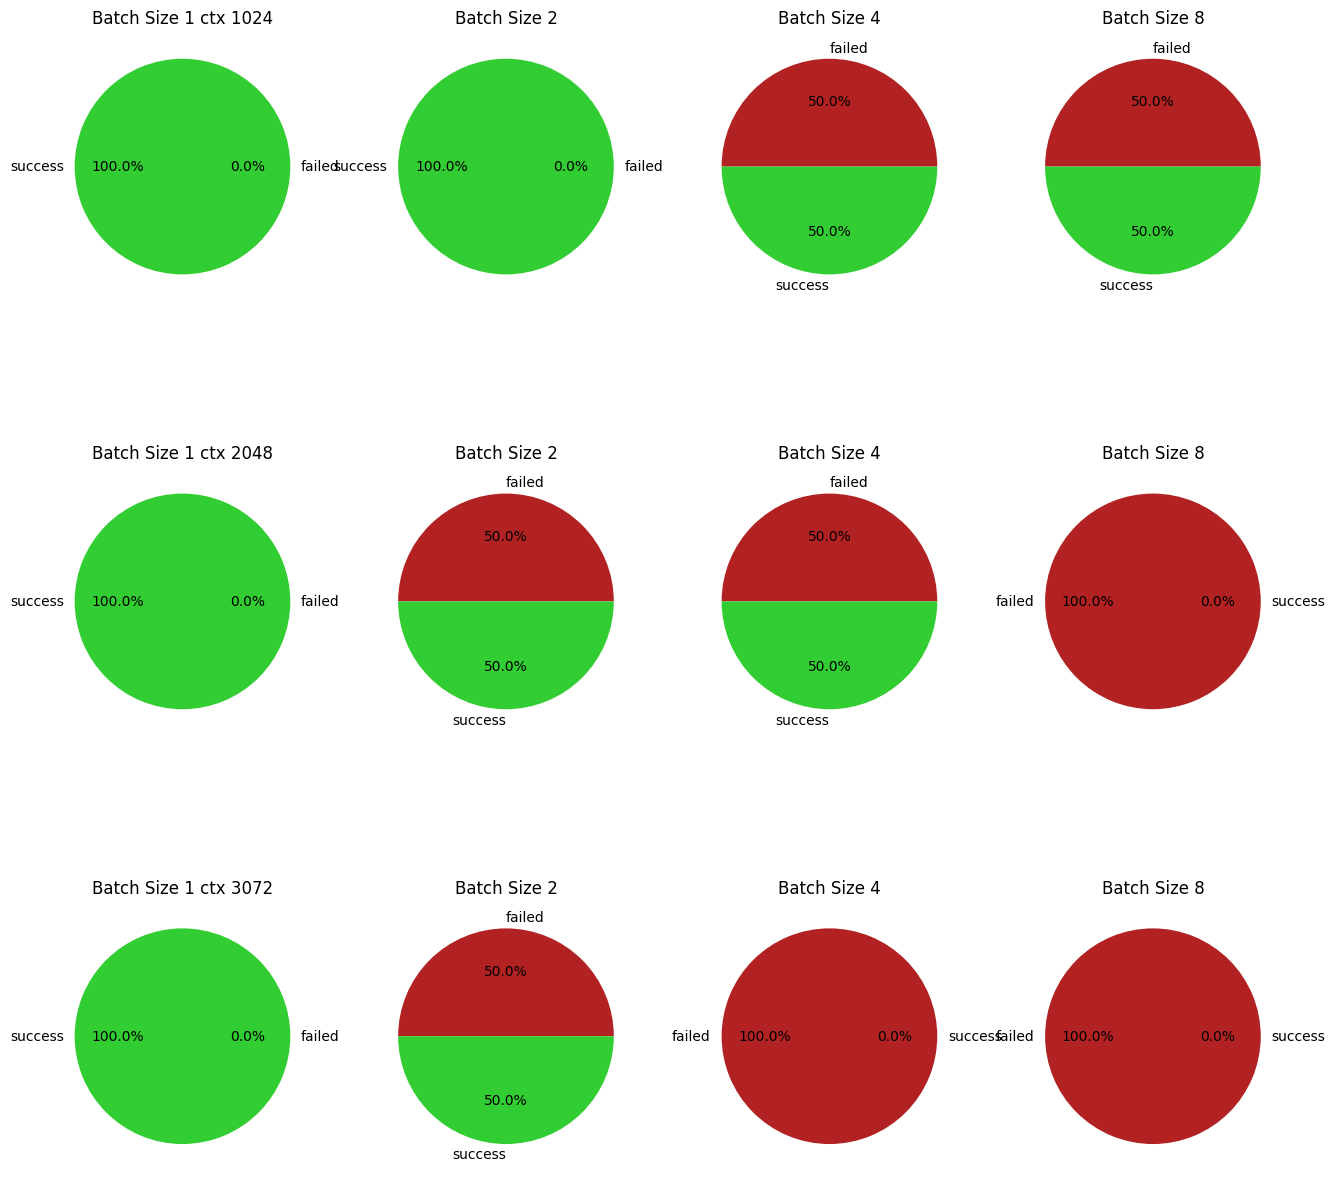

In [10]:
fig, axs = plt.subplots(3, 4)
fig.set_size_inches(16, 16)

f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 1) & (df_memory["context_length"] == 1024)])
axs[0][0].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 1 & ctx 1024:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 2) & (df_memory["context_length"] == 1024)])
axs[0][1].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 2 & ctx 1024:")
print("Failed", len(f))
print("Succeed", len(s))


f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 4) & (df_memory["context_length"] == 1024)])
axs[0][2].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 4 & ctx 1024:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 8) & (df_memory["context_length"] == 1024)])
axs[0][3].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 8 & ctx 1024:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 1) & (df_memory["context_length"] == 2048)])
axs[1][0].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 1 & ctx 2048:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 2) & (df_memory["context_length"] == 2048)])
axs[1][1].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 2 & ctx 2048:")
print("Failed", len(f))
print("Succeed", len(s))


f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 4) & (df_memory["context_length"] == 2048)])
axs[1][2].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 4 & ctx 2048:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 8) & (df_memory["context_length"] == 2048)])
axs[1][3].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 8 & ctx 2048:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 1) & (df_memory["context_length"] == 3072)])
axs[2][0].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 1 & ctx 3072:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 2) & (df_memory["context_length"] == 3072)])
axs[2][1].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 2 & ctx 3072:")
print("Failed", len(f))
print("Succeed", len(s))


f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 4) & (df_memory["context_length"] == 3072)])
axs[2][2].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 4 & ctx 3072:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 8) & (df_memory["context_length"] == 3072)])
axs[2][3].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 8 & ctx 3072:")
print("Failed", len(f))
print("Succeed", len(s))

axs[0][0].set_title("Batch Size 1 ctx 1024");
axs[0][1].set_title("Batch Size 2");
axs[0][2].set_title("Batch Size 4");
axs[0][3].set_title("Batch Size 8");
axs[1][0].set_title("Batch Size 1 ctx 2048");
axs[1][1].set_title("Batch Size 2");
axs[1][2].set_title("Batch Size 4");
axs[1][3].set_title("Batch Size 8");
axs[2][0].set_title("Batch Size 1 ctx 3072");
axs[2][1].set_title("Batch Size 2");
axs[2][2].set_title("Batch Size 4");
axs[2][3].set_title("Batch Size 8");

Lora Rvalue 32:
Failed 11
Succeed 13
Lora Rvalue 64:
Failed 11
Succeed 13
Lora Rvalue 128:
Failed 11
Succeed 13
Lora Rvalue 256:
Failed 11
Succeed 13


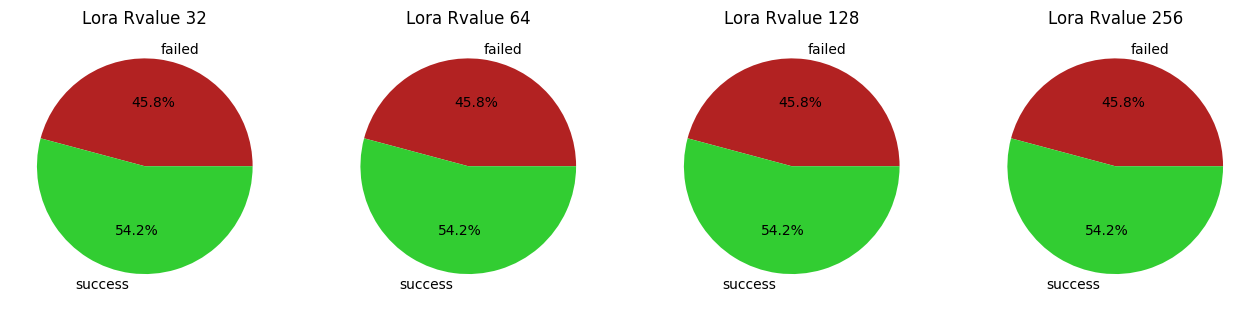

In [11]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches(16, 16)

f, s = get_failed_and_success(df_memory.loc[df_memory["lora_rvalue"] == 32])
ax1.pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Lora Rvalue 32:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[df_memory["lora_rvalue"] == 64])
ax2.pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Lora Rvalue 64:")
print("Failed", len(f))
print("Succeed", len(s))


f, s = get_failed_and_success(df_memory.loc[df_memory["lora_rvalue"] == 128])
ax3.pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Lora Rvalue 128:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[df_memory["lora_rvalue"] == 256])
ax4.pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Lora Rvalue 256:")
print("Failed", len(f))
print("Succeed", len(s))

ax1.set_title("Lora Rvalue 32");
ax2.set_title("Lora Rvalue 64");
ax3.set_title("Lora Rvalue 128");
ax4.set_title("Lora Rvalue 256");

In [12]:
df_memory.columns


Index(['run_name', 'is_success', 'Runtime', 'bf16', 'fp16',
       'gradient_accumulation_steps', 'gradient_checkpointing',
       'gradient_checkpointing_kwargs.use_reentrant',
       'quantization_config._load_in_4bit',
       'quantization_config._load_in_8bit',
       'quantization_config.bnb_4bit_compute_dtype',
       'quantization_config.bnb_4bit_quant_type',
       'quantization_config.bnb_4bit_use_double_quant',
       'quantization_config.quant_method', 'per_device_train_batch_size',
       'system/gpu.0.memoryAllocatedBytes__MAX', 'context_length',
       'lora_rvalue', 'memory_used_gigas'],
      dtype='object')

In [101]:
gp = df_memory[["per_device_train_batch_size", "context_length", "is_success"]].groupby(["per_device_train_batch_size", "context_length"])
success_rate_batch_context = gp.sum() / gp.count()
success_rate_batch_context = pd.DataFrame(data=success_rate_batch_context.apply(lambda x: (x.name[0], x.name[1], x['is_success']*100), axis=1).to_list(), columns=["batch_size", "context_length", "success_rate"])

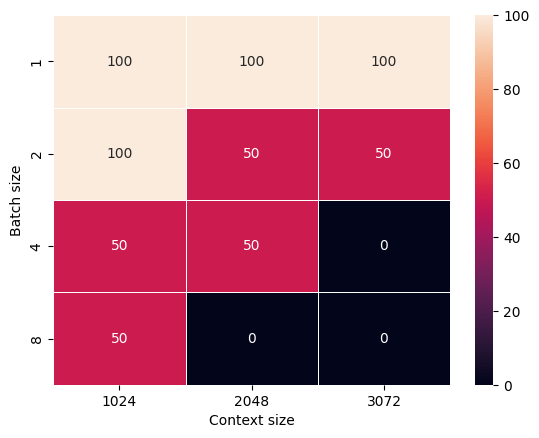

In [107]:
success_rate_batch_context_heatmap = success_rate_batch_context.pivot(index="batch_size", columns="context_length", values="success_rate")
ax = sns.heatmap(success_rate_batch_context_heatmap, annot=True, fmt=".0f", vmin=0, vmax=100, linewidths=.5)
ax.set(xlabel="Context size", ylabel="Batch size");

In [111]:
gp = df_memory[["per_device_train_batch_size", "gradient_checkpointing", "is_success"]].groupby(["per_device_train_batch_size", "gradient_checkpointing"])
success_rate_batch_gc = gp.sum() / gp.count()
success_rate_batch_gc = pd.DataFrame(data=success_rate_batch_gc.apply(lambda x: (x.name[0], x.name[1], x['is_success']*100), axis=1).to_list(), columns=["batch_size", "gradient_checkpointing", "success_rate"])
success_rate_batch_gc

,batch_size,gradient_checkpointing,success_rate
0,1,False,100.000000
1,1,True,100.000000
2,2,False,33.333333
3,2,True,100.000000
4,4,False,0.000000
5,4,True,66.666667
6,8,False,0.000000
7,8,True,33.333333


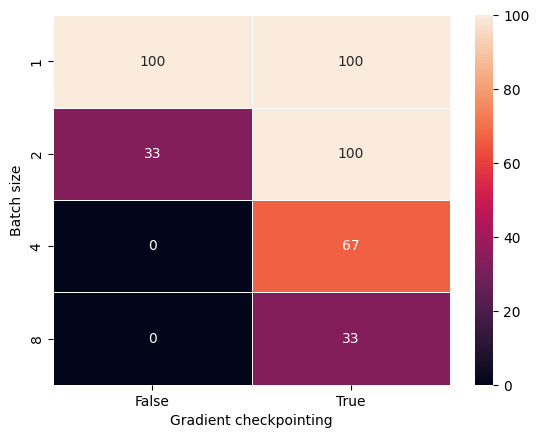

In [114]:
success_rate_batch_gc_heatmap = success_rate_batch_gc.pivot(index="batch_size", columns="gradient_checkpointing", values="success_rate")
ax = sns.heatmap(success_rate_batch_gc_heatmap, annot=True, fmt=".0f", vmin=0, vmax=100, linewidths=.5)
ax.set(xlabel="Gradient checkpointing", ylabel="Batch size");

In [119]:
gp = df_memory[["context_length", "gradient_checkpointing", "is_success"]].groupby(["context_length", "gradient_checkpointing"])
success_rate_context_gc = gp.sum() / gp.count()
success_rate_context_gc = pd.DataFrame(data=success_rate_context_gc.apply(lambda x: (x.name[0], x.name[1], x['is_success']*100), axis=1).to_list(), columns=["context_length", "gradient_checkpointing", "success_rate"])
success_rate_context_gc

,context_length,gradient_checkpointing,success_rate
0,1024,False,50.0
1,1024,True,100.0
2,2048,False,25.0
3,2048,True,75.0
4,3072,False,25.0
5,3072,True,50.0


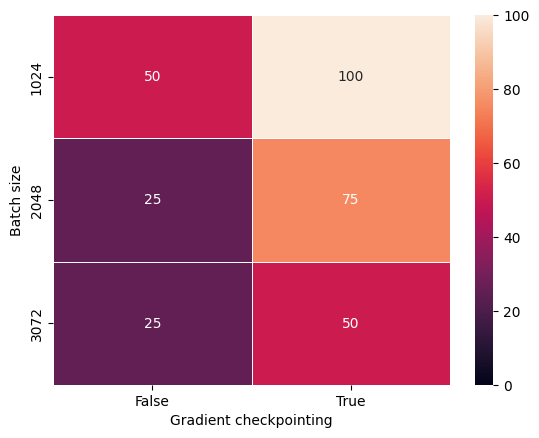

In [121]:
success_rate_context_gc_heatmap = success_rate_context_gc.pivot(index="context_length", columns="gradient_checkpointing", values="success_rate")
ax = sns.heatmap(success_rate_context_gc_heatmap, annot=True, fmt=".0f", vmin=0, vmax=100, linewidths=.5)
ax.set(xlabel="Gradient checkpointing", ylabel="Context length");

<Axes: xlabel='context_length', ylabel='system/gpu.0.memoryAllocatedBytes__MAX'>

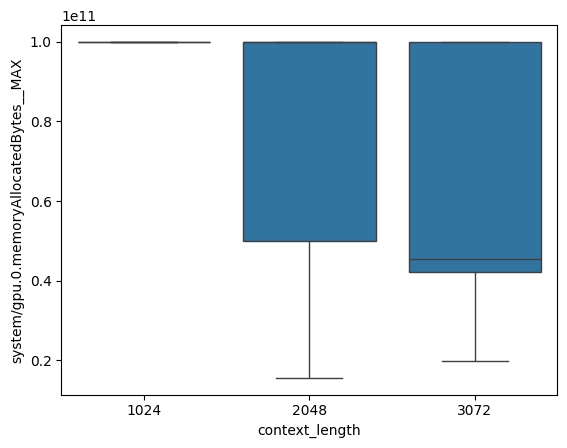

In [124]:
sns.boxplot(data=df_memory, x="context_length", y="system/gpu.0.memoryAllocatedBytes__MAX")

In [14]:
# mistral_data = df_memory.loc[df_memory.run_name.str.contains('mistral', case=False)]
# llama_data = df_memory.loc[df_memory.run_name.str.contains('llama', case=False)]

In [15]:
# fig, (ax1, ax2) = plt.subplots(1, 2)
# data_sep_gc_mistral = [
#     mistral_data.loc[(mistral_data['gradient_checkpointing'] == True)].memory_used_gigas,
#     mistral_data.loc[(mistral_data['gradient_checkpointing'] == False)].memory_used_gigas
#     ]

# data_sep_gc_llama = [
#     llama_data.loc[(llama_data['gradient_checkpointing'] == True)].memory_used_gigas,
#     llama_data.loc[(llama_data['gradient_checkpointing'] == False)].memory_used_gigas
#     ]
# labels = ["with", "without"]
# ax1.boxplot(x=data_sep_gc_mistral, labels=labels)
# ax1.set_title("Mistral")

# ax2.boxplot(x=data_sep_gc_llama, labels=labels)
# ax2.set_title("Llama 2")
# fig.suptitle('Memory used (in Go), with and without gradient checkpointing')
# plt.show()

In [16]:
# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.set_size_inches(8, 4)

# ax1.scatter(x=mistral_data.context_length, y=mistral_data.memory_used_gigas, c=mistral_data.gradient_checkpointing)
# ax1.set_title("Mistral")

# scatter = ax2.scatter(x=llama_data.context_length, y=llama_data.memory_used_gigas, c=llama_data.gradient_checkpointing)
# ax2.set_title("Llama 2")
# fig.suptitle('y-axis Memory used (in Go) from x-axis context length')
# fig.legend(
#     handles=scatter.legend_elements()[0],
#     labels=["without gradient checkpointing", "with gradient checkpointing"],
#     loc="upper left",
#     bbox_to_anchor=(0.9, 0.9)
#     )
# plt.show()

In [17]:
# fig, ax = plt.subplots()
# fig.set_size_inches(5, 4)

# scatter = ax.scatter(
#     x=mistral_data.context_length,
#     y=mistral_data.memory_used_gigas,
#     c=mistral_data.gradient_checkpointing,
#     marker="+"
#     )
# scatter = ax.scatter(
#     x=llama_data.context_length,
#     y=llama_data.memory_used_gigas,
#     c=llama_data.gradient_checkpointing,
#     marker="o"
#     )
# ax.set_title("Mistral (+) and Llama 2 (o) together")

# fig.suptitle('y-axis Memory used (in Go) from x-axis context length (in tokens)')
# fig.legend(
#     handles=scatter.legend_elements()[0],
#     labels=["without gradient checkpointing", "with gradient checkpointing"],
#     loc="upper left",
#     bbox_to_anchor=(0.9, 0.9)
#     )
# plt.show()

# Merging dataset

In [18]:
# df = pd.read_csv("../datasets/memory_experiment.csv")
# df.head()

In [19]:
# df_to_merge = pd.read_csv("../datasets/memory_experiment_bytes.csv")
# df_to_merge.head()

In [20]:
# def col_to_model_col(col):
#     col_split = col.rfind(" - ")
#     col_name = col[col_split+3:]
#     model_name = col[:col_split]
#     return model_name, col_name

# col_to_model_col(df_to_merge.columns[1])

In [21]:
# the_data = {}
# for col in df_to_merge.columns[1:]:
#     data = df_to_merge[col].item()
#     model_name, col_name = col_to_model_col(col)
    
#     if model_name not in the_data.keys():
#         the_data.update({model_name: {col_name: data}})
#     else:
#         the_data[model_name].update({col_name: data})
# df_the_data = pd.DataFrame.from_dict(data=the_data, orient='index')
# df_the_data.head()

In [22]:
# df_merged = df.join(df_the_data, how="left", on="Name")
# df_merged.head()

In [23]:
# len(df_merged)

In [24]:
# df_merged.to_csv("../datasets/memory_experiment_merged.csv")

In [25]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.feature_selection import mutual_info_regression
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor

In [26]:
# # Convert boolean columns to numeric
# bool_columns = ['is_success', 'bf16', 'fp16', 'gradient_checkpointing', 
#                 'gradient_checkpointing_kwargs.use_reentrant', 
#                 'quantization_config._load_in_4bit', 'quantization_config._load_in_8bit', 
#                 'quantization_config.bnb_4bit_use_double_quant']
# df_memory[bool_columns] = df_memory[bool_columns].astype(int)

# # Select relevant features for analysis
# feature_cols = ['bf16', 'fp16', 'gradient_accumulation_steps', 'gradient_checkpointing',
#                 'quantization_config._load_in_4bit', 'quantization_config._load_in_8bit',
#                 'per_device_train_batch_size', 'context_length', 'lora_rvalue',
#                 'quantization_config.bnb_4bit_use_double_quant', 'is_success',
#                 'system/gpu.0.memoryAllocatedBytes__MAX']

# # Function to plot correlation heatmap
# def plot_correlation_heatmap(df, columns, title):
#     plt.figure(figsize=(12, 10))
#     corr = df[columns].corr()
#     plt.imshow(corr, cmap='coolwarm', aspect='auto')
#     plt.colorbar()
#     plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
#     plt.yticks(range(len(corr.columns)), corr.columns)
#     plt.title(title)
#     plt.tight_layout()
#     plt.show()

# # Function to plot scatter plots
# def plot_scatter(df, x, y, c, title):
#     plt.figure(figsize=(10, 6))
#     scatter = plt.scatter(df[x], df[y], c=df[c], cmap='viridis')
#     plt.colorbar(scatter)
#     plt.xlabel(x)
#     plt.ylabel(y)
#     plt.title(title)
#     plt.tight_layout()
#     plt.show()

# # Function to plot bar plots
# def plot_bar(df, x, y, title):
#     plt.figure(figsize=(10, 6))
#     df.groupby(x)[y].mean().plot(kind='bar')
#     plt.title(title)
#     plt.xlabel(x)
#     plt.ylabel(f'Mean {y}')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

# # Analyze correlations
# plot_correlation_heatmap(df_memory, feature_cols, "Correlation Heatmap of Model Run Parameters")

# # Prepare features for analysis
# X = df_memory[feature_cols[:-2]]  # Exclude 'is_success' and 'system/gpu.0.memoryAllocatedBytes__MAX'
# y_memory = df_memory['system/gpu.0.memoryAllocatedBytes__MAX']

# # Perform PCA
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# pca = PCA()
# X_pca = pca.fit_transform(X_scaled)

# # Plot PCA results
# plt.figure(figsize=(10, 6))
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('PCA Analysis')
# plt.show()

# # Plot first two principal components
# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_memory, cmap='viridis')
# plt.colorbar(scatter)
# plt.xlabel('First Principal Component')
# plt.ylabel('Second Principal Component')
# plt.title('PCA: Memory Usage')
# plt.show()

# # Calculate feature importance using mutual information
# mi_memory = mutual_info_regression(X, y_memory)

# # Plot feature importance
# plt.figure(figsize=(10, 6))
# plt.bar(X.columns, mi_memory)
# plt.title('Feature Importance for Memory Usage')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# # Train Random Forest model
# X_train, X_test, y_memory_train, y_memory_test = train_test_split(X, y_memory, test_size=0.2, random_state=42)
# rf_memory = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_memory.fit(X_train, y_memory_train)

# # Plot feature importance from Random Forest
# plt.figure(figsize=(10, 6))
# plt.bar(X.columns, rf_memory.feature_importances_)
# plt.title('Random Forest: Feature Importance for Memory Usage')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# # Analyze the impact of quantization methods on memory usage
# if 'quantization_config.quant_method' in df_memory.columns:
#     plot_bar(df_memory, 'quantization_config.quant_method', 'system/gpu.0.memoryAllocatedBytes__MAX',
#              "Impact of Quantization Method on Max GPU Memory Usage")

# # Analyze the impact of precision (bf16 vs fp16) on memory usage
# plot_bar(df_memory, 'bf16', 'system/gpu.0.memoryAllocatedBytes__MAX',
#          "Impact of bf16 on Max GPU Memory Usage")
# plot_bar(df_memory, 'fp16', 'system/gpu.0.memoryAllocatedBytes__MAX',
#          "Impact of fp16 on Max GPU Memory Usage")

# # Print summary statistics for memory usage
# print(df_memory['system/gpu.0.memoryAllocatedBytes__MAX'].describe())

# # Print the top 5 parameter combinations that resulted in the lowest memory usage
# top_5_low_memory = df_memory.nsmallest(5, 'system/gpu.0.memoryAllocatedBytes__MAX')[
#     ['system/gpu.0.memoryAllocatedBytes__MAX'] + list(X.columns)
# ]
# print("\nTop 5 parameter combinations with lowest memory usage:")
# print(top_5_low_memory)

# # Analyze the relationship between different hyperparameters and memory usage
# for feature in X.columns:
#     plot_scatter(df_memory, feature, 'system/gpu.0.memoryAllocatedBytes__MAX', 'is_success',
#                  f"Impact of {feature} on Max GPU Memory Usage")

# # Analyze the relationship between context length and memory usage
# plot_scatter(df_memory, 'context_length', 'system/gpu.0.memoryAllocatedBytes__MAX', 'is_success',
#              "Relationship between Context Length and Max GPU Memory Usage")

# # Analyze the impact of gradient checkpointing on memory usage
# plot_bar(df_memory, 'gradient_checkpointing', 'system/gpu.0.memoryAllocatedBytes__MAX',
#          "Impact of Gradient Checkpointing on Max GPU Memory Usage")

# # Analyze the impact of quantization bits on memory usage
# plot_bar(df_memory, 'quantization_config._load_in_4bit', 'system/gpu.0.memoryAllocatedBytes__MAX',
#          "Impact of 4-bit Quantization on Max GPU Memory Usage")
# plot_bar(df_memory, 'quantization_config._load_in_8bit', 'system/gpu.0.memoryAllocatedBytes__MAX',
#          "Impact of 8-bit Quantization on Max GPU Memory Usage")


In [27]:
# Main analysis
print(df_memory.describe())

plot_correlation_heatmap(df_memory)
plot_feature_importance(df_memory)
plot_scatter_matrix(df_memory)

# Analyze the impact of categorical variables
categorical_vars = ['bf16', 'fp16', 'gradient_checkpointing', 'quantization_config._load_in_4bit', 'quantization_config._load_in_8bit']

for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    df_memory.boxplot(column='memory_used_gigas', by=var)
    plt.title(f'Impact of {var} on Memory Usage')
    plt.suptitle('')  # This removes the automatic suptitle added by pandas
    plt.tight_layout()
    plt.show()

# Analyze the impact of context length
plt.figure(figsize=(10, 6))
df_memory.boxplot(column='memory_used_gigas', by='context_length')
plt.title('Impact of Context Length on Memory Usage')
plt.suptitle('')
plt.tight_layout()
plt.show()

# Analyze the relationship between batch size and memory usage
plt.figure(figsize=(10, 6))
plt.scatter(df_memory['per_device_train_batch_size'], df_memory['memory_used_gigas'])
plt.title('Relationship between Batch Size and Memory Usage')
plt.xlabel('Per Device Train Batch Size')
plt.ylabel('Memory Used (GB)')
plt.tight_layout()
plt.show()

           Runtime  gradient_accumulation_steps  per_device_train_batch_size  \
count    96.000000                         96.0                    96.000000   
mean   1194.854167                          4.0                     3.750000   
std     998.279520                          0.0                     2.695025   
min       5.000000                          4.0                     1.000000   
25%      21.000000                          4.0                     1.750000   
50%    1851.000000                          4.0                     3.000000   
75%    2056.000000                          4.0                     5.000000   
max    2442.000000                          4.0                     8.000000   

       system/gpu.0.memoryAllocatedBytes__MAX  context_length  lora_rvalue  \
count                            9.600000e+01       96.000000    96.000000   
mean                             8.048559e+10     2048.000000   120.000000   
std                              2.974479e+10

NameError: name 'plot_correlation_heatmap' is not defined